In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("Cleaned_Employee_Attrition.csv")

# Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (20, 5)

df.shape

(1470, 50)

In [41]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,AgeGroup,TenureBucket
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,1,0,0,1,36-45,5-10 yrs
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,1,0,0,1,0,46-60,5-10 yrs
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,0,1,36-45,<2 yrs
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,0,1,0,0,1,0,26-35,5-10 yrs
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,0,1,0,26-35,<2 yrs


# 📊 ATTRITION OVERVIEW

## 🔎 1. What is the overall attrition rate?

Attrition Counts:
 Attrition
0    1233
1     237
Name: count, dtype: int64

Attrition Percentage:
 Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


C:\Users\himan\AppData\Local\Temp\ipykernel_30220\547877583.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette="Set2")


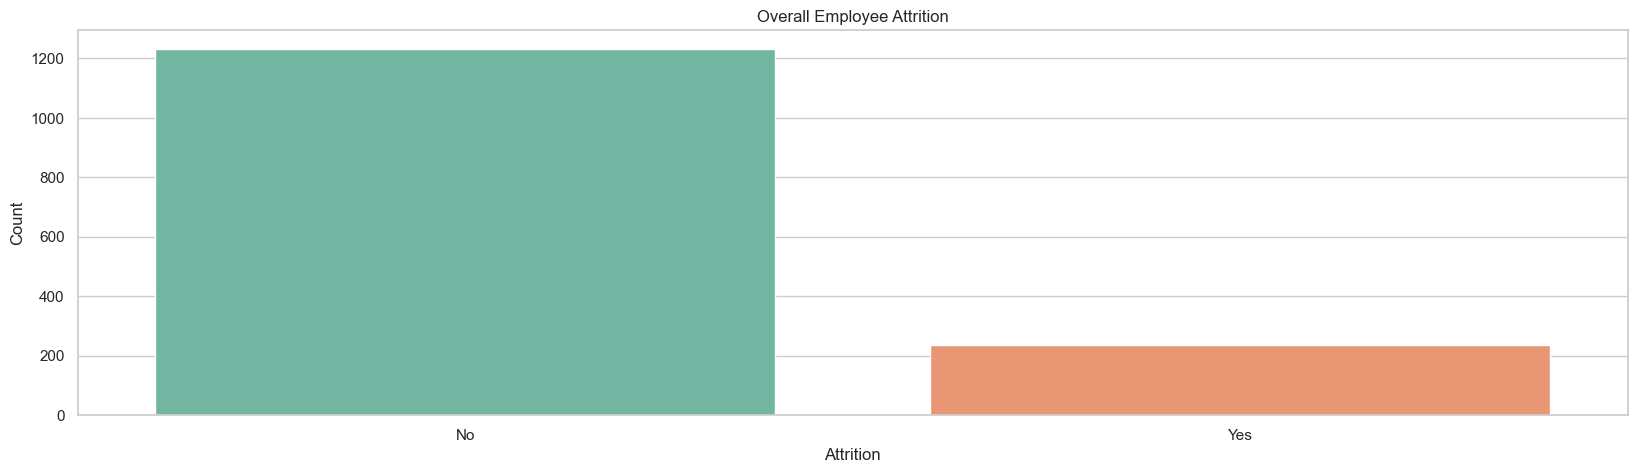

In [42]:
attrition_counts = df['Attrition'].value_counts()
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100
print("Attrition Counts:\n", attrition_counts)
print("\nAttrition Percentage:\n", attrition_percent)

sns.countplot(x='Attrition', data=df, palette="Set2")
plt.title("Overall Employee Attrition")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("Count")
plt.xlabel("Attrition")
plt.show()

## 🔎 2. Attrition by Gender

Attrition by Gender:
 Attrition       0    1   All
Gender_Male                 
0             501   87   588
1             732  150   882
All          1233  237  1470


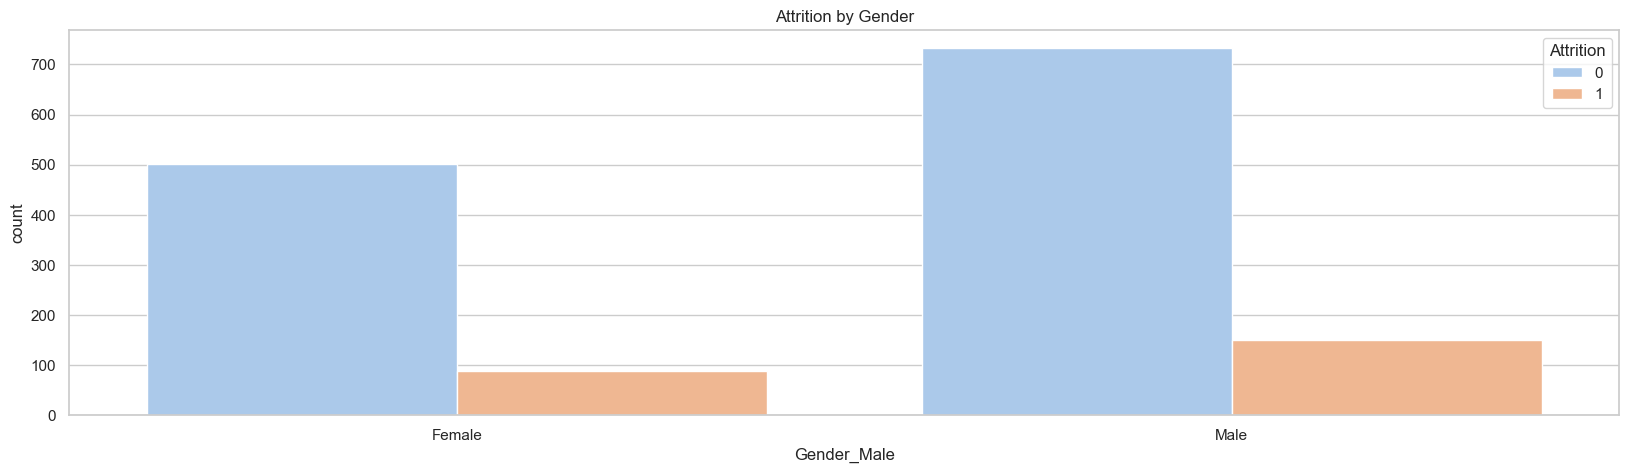

In [43]:
gender_counts = pd.crosstab(df['Gender_Male'], df['Attrition'], margins=True)
print("Attrition by Gender:\n", gender_counts)

sns.countplot(data=df, x='Gender_Male', hue='Attrition', palette="pastel")
plt.title("Attrition by Gender")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

## 🔎 3. Attrition by Age Group

Attrition by Age Group:
 Attrition     0    1   All
AgeGroup                  
18-25        79   44   123
26-35       490  116   606
36-45       425   43   468
46-60       239   34   273
All        1233  237  1470


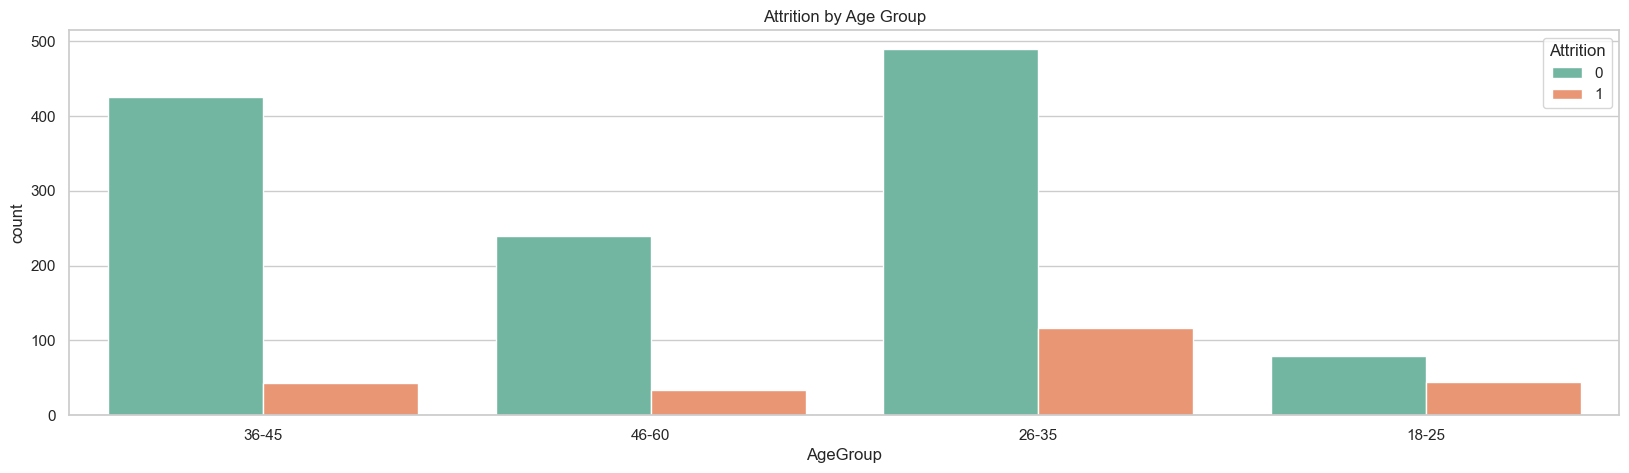

In [44]:
age_counts = pd.crosstab(df['AgeGroup'], df['Attrition'], margins=True)
print("Attrition by Age Group:\n", age_counts)

sns.countplot(data=df, x='AgeGroup', hue='Attrition', palette="Set2")
plt.title("Attrition by Age Group")
plt.show()

## 🔎 4. Attrition by Marital Status

Marital Status vs Attrition (Counts):
 Attrition                                     0    1
MaritalStatus_Married MaritalStatus_Single          
0                     0                     294   33
                      1                     350  120
1                     0                     589   84


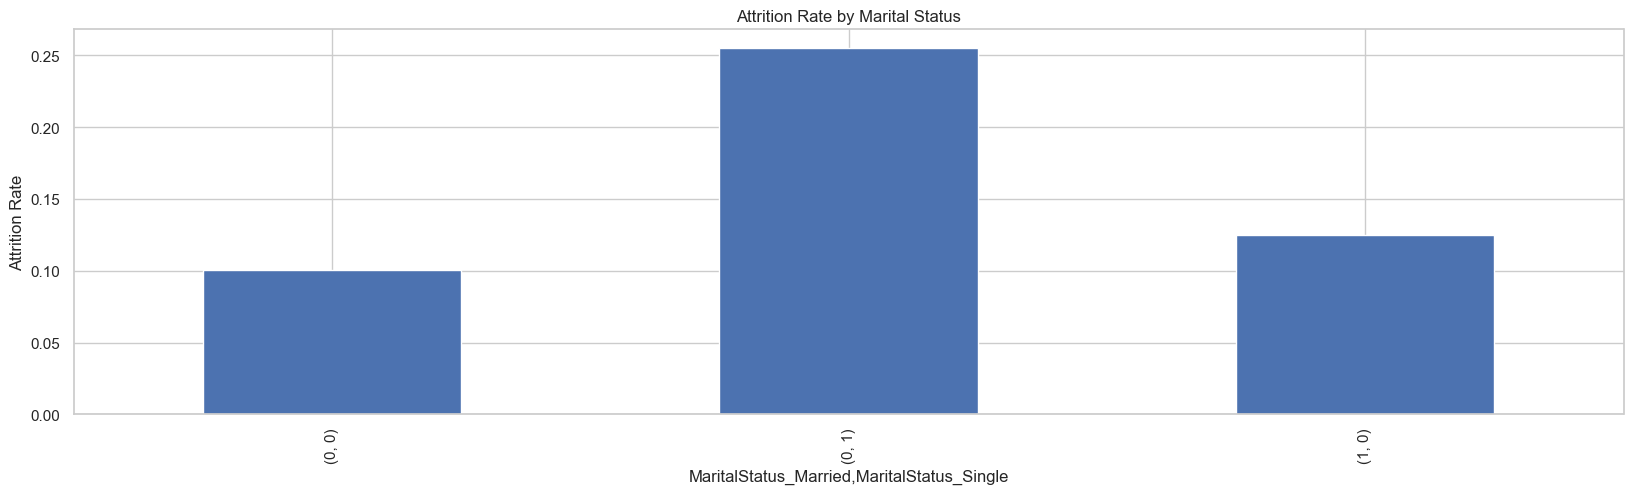

In [45]:
marital_cols = [col for col in df.columns if 'MaritalStatus' in col]
marital_data = df[['Attrition'] + marital_cols]
marital_ct = marital_data.groupby(marital_cols)['Attrition'].value_counts().unstack().fillna(0)
print("Marital Status vs Attrition (Counts):\n", marital_ct)

marital_data.groupby(marital_cols)['Attrition'].mean().plot(kind='bar')
plt.title("Attrition Rate by Marital Status")
plt.ylabel("Attrition Rate")
plt.show()

# 📋 WORK CONDITIONS

## 🔎 5. Attrition by Department

Department vs Attrition (Counts):
 Attrition                                             0    1
Department_Research & Development Department_Sales          
0                                 0                  51   12
                                  1                 354   92
1                                 0                 828  133


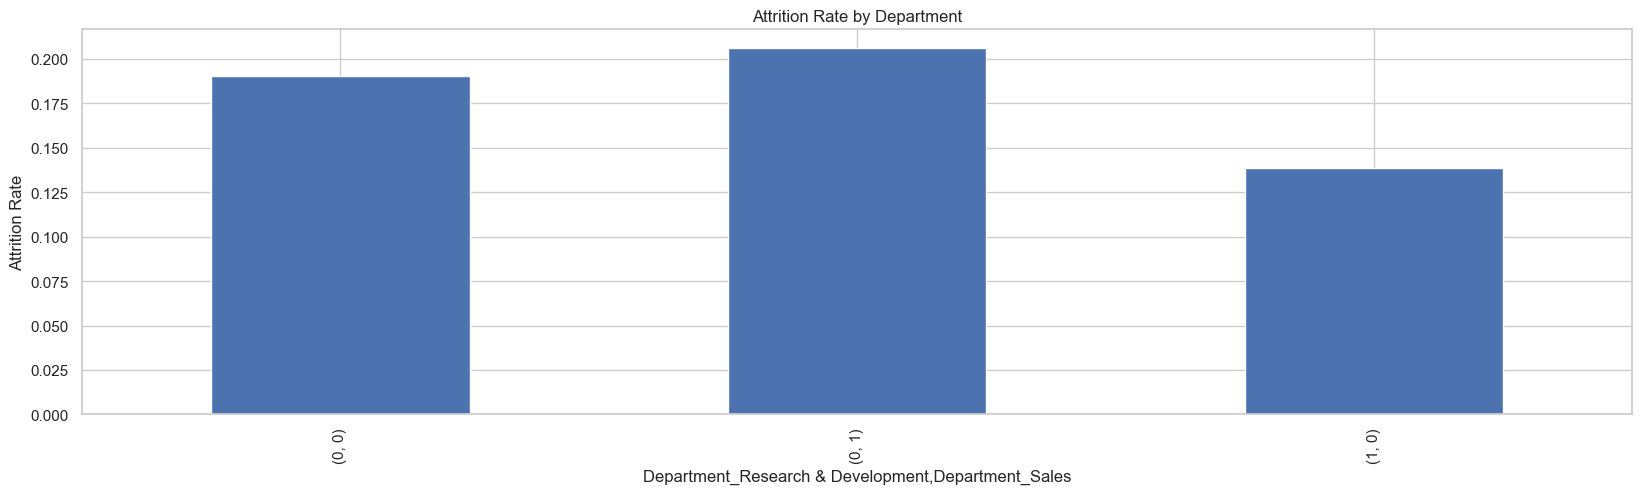

In [46]:
dept_cols = [col for col in df.columns if 'Department' in col]
dept_data = df[['Attrition'] + dept_cols]
dept_ct = dept_data.groupby(dept_cols)['Attrition'].value_counts().unstack().fillna(0)
print("Department vs Attrition (Counts):\n", dept_ct)

dept_data.groupby(dept_cols)['Attrition'].mean().plot(kind='bar')
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate")
plt.show()

## 🔎 6. Attrition by Job Role

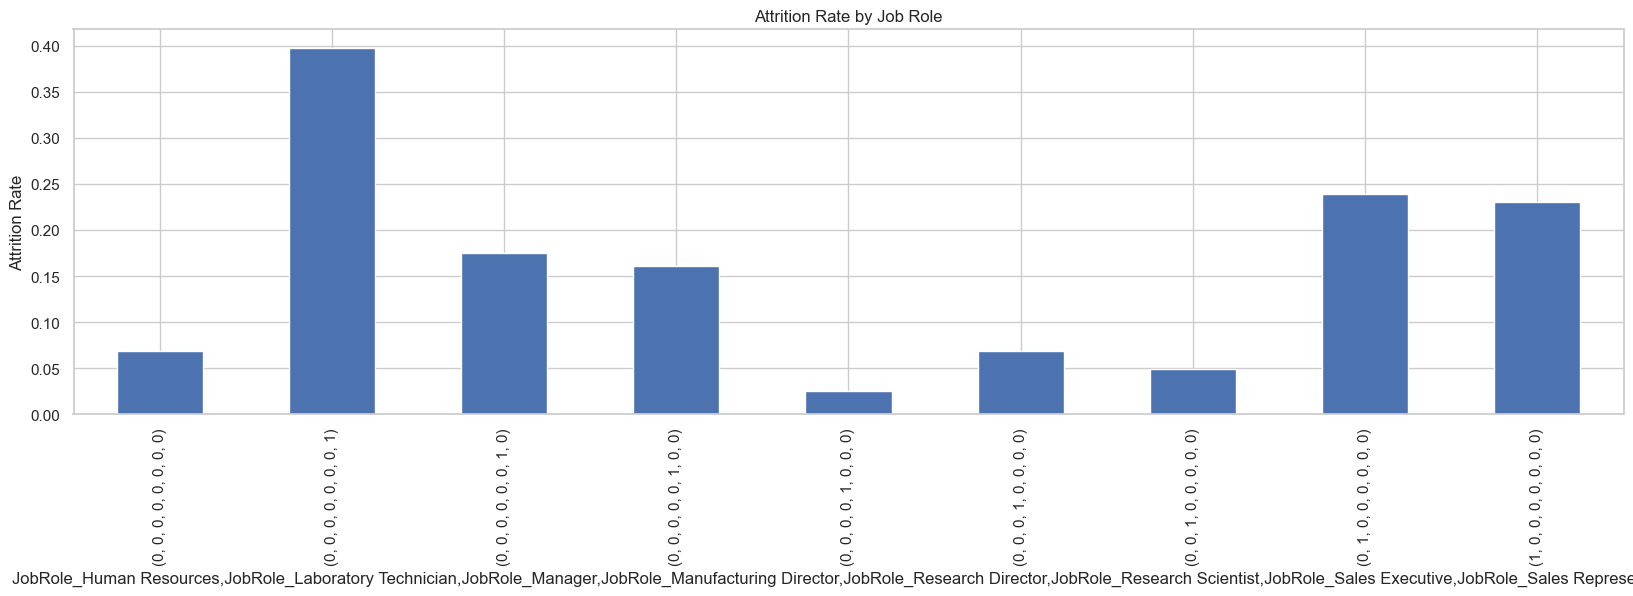

In [47]:
job_cols = [col for col in df.columns if 'JobRole' in col]
df.groupby(job_cols)['Attrition'].mean().plot(kind='bar')
plt.title("Attrition Rate by Job Role")
plt.ylabel("Attrition Rate")
plt.show()

## 🔎 7. Attrition vs. Years at Company

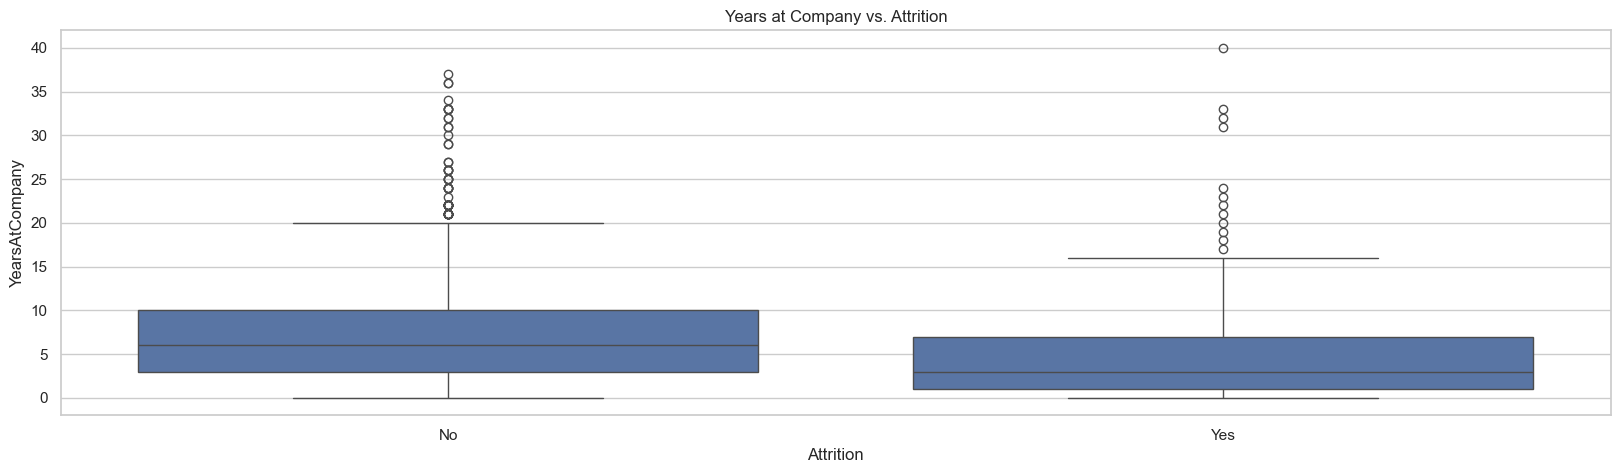

In [48]:
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title("Years at Company vs. Attrition")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


## 🔎 8. Attrition by Tenure Bucket

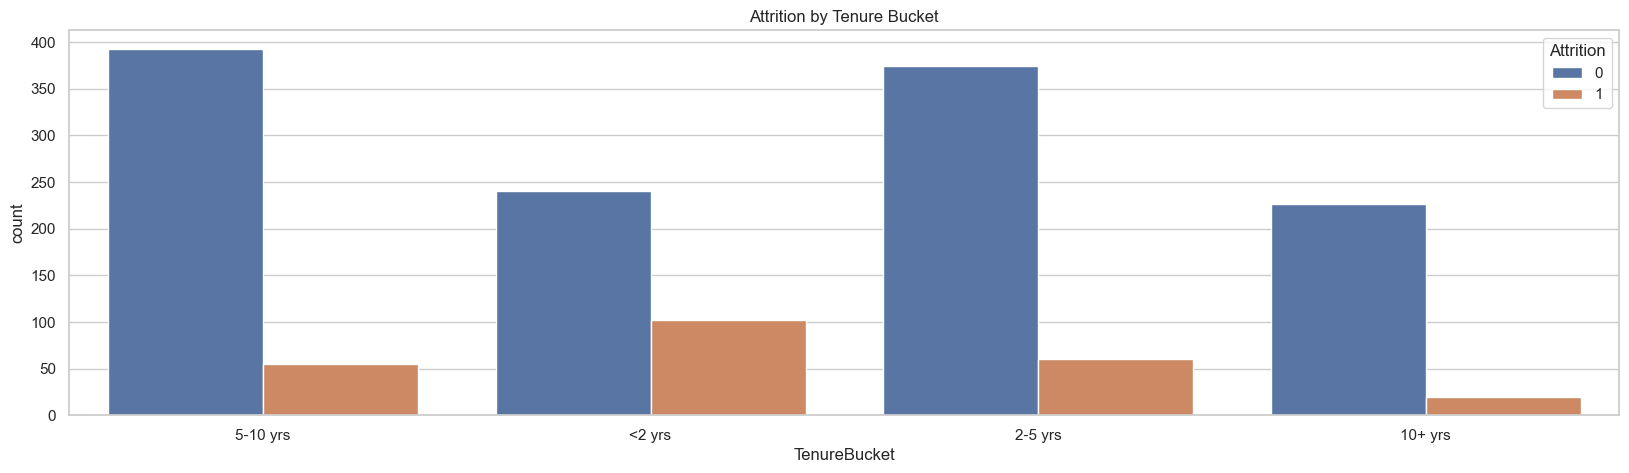

In [49]:
sns.countplot(data=df, x='TenureBucket', hue='Attrition')
plt.title("Attrition by Tenure Bucket")
plt.show()

## 🔎 9. Attrition vs. Work Life Balance

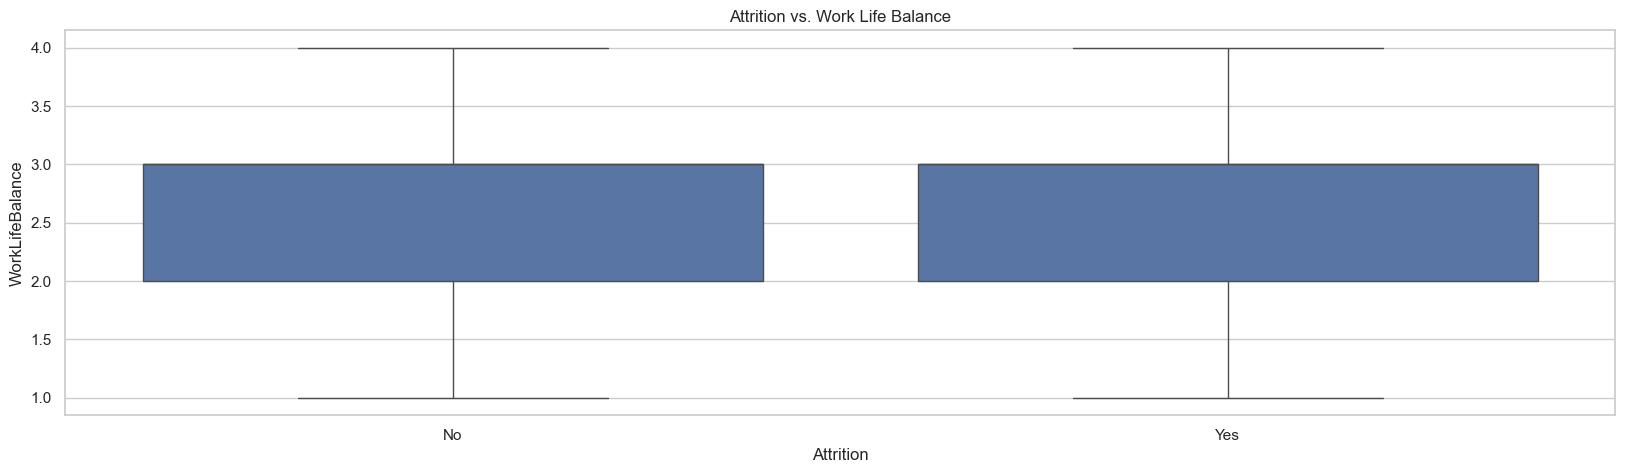

In [50]:
sns.boxplot(data=df, x='Attrition', y='WorkLifeBalance')
plt.title("Attrition vs. Work Life Balance")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 💰 COMPENSATION & PROMOTION

## 🔎 10. Attrition vs. Monthly Income

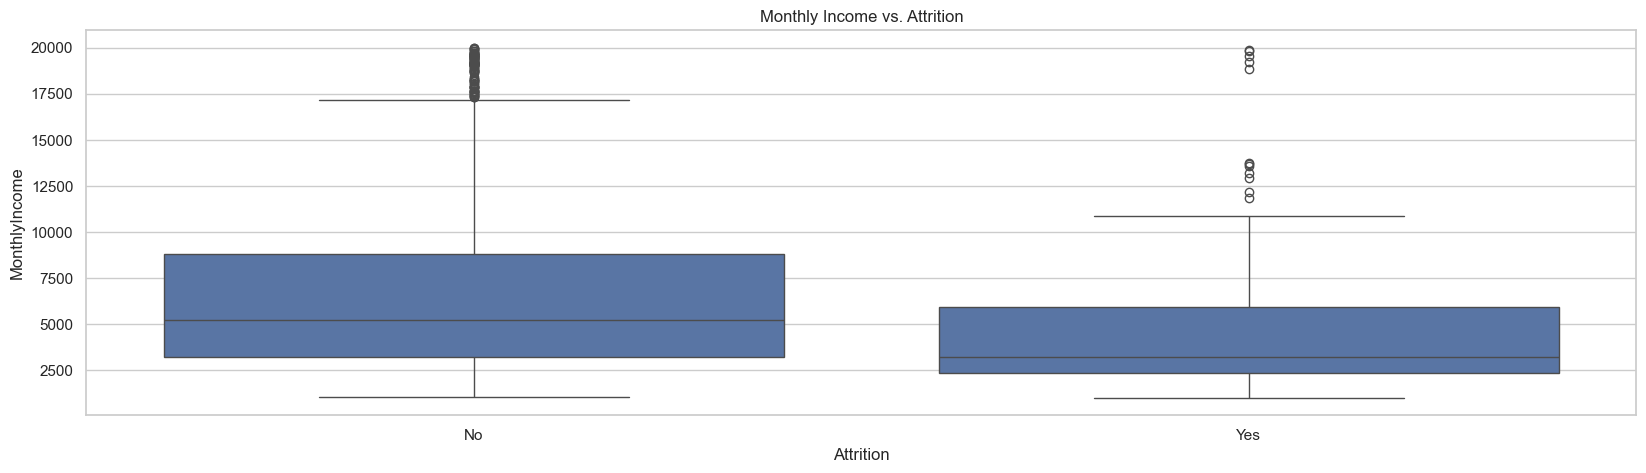

In [51]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs. Attrition")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## 🔎 11. Attrition vs. Job Satisfaction

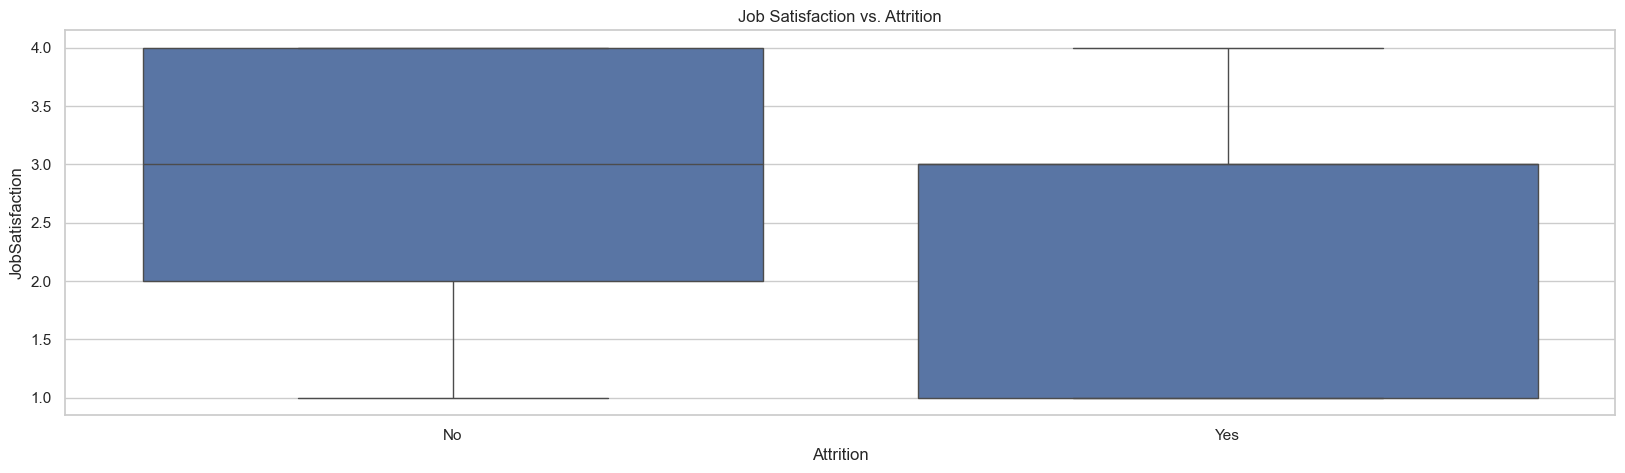

In [52]:
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title("Job Satisfaction vs. Attrition")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## 🔎 12. Attrition vs. Performance Rating

            count      mean       std  min  25%  50%  75%  max
Attrition                                                     
0          1233.0  3.153285  0.360408  3.0  3.0  3.0  3.0  4.0
1           237.0  3.156118  0.363735  3.0  3.0  3.0  3.0  4.0


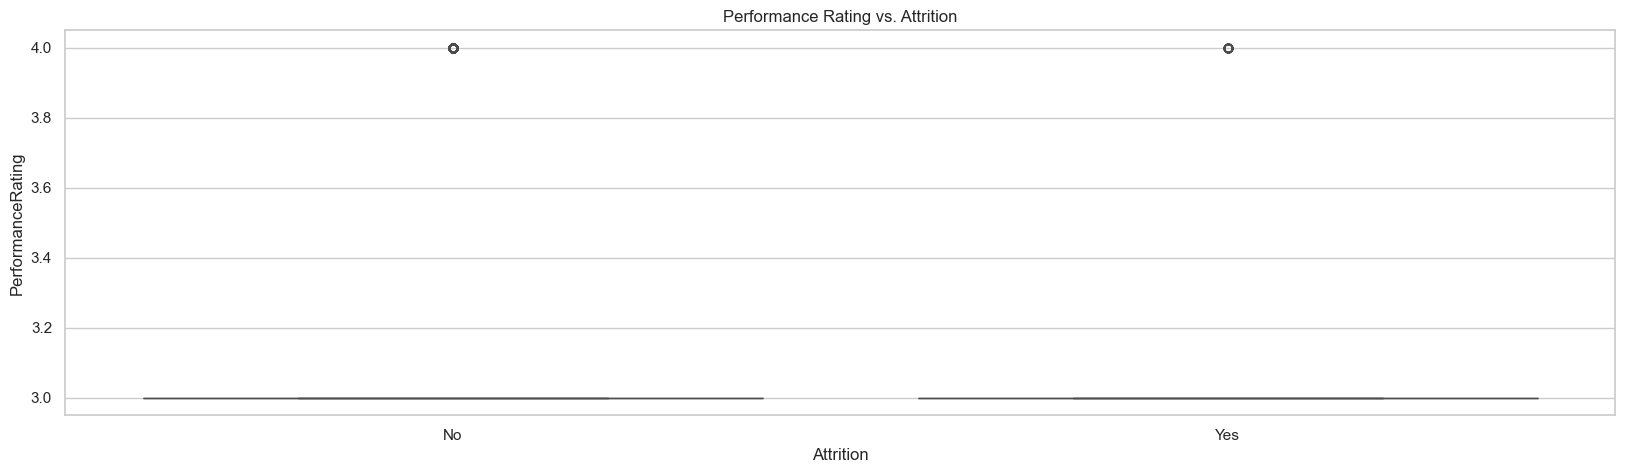

In [57]:
print(df.groupby('Attrition')['PerformanceRating'].describe())

sns.boxplot(x='Attrition', y='PerformanceRating', data=df)
plt.title("Performance Rating vs. Attrition")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## 🔎 13. Attrition vs. Percent Salary Hike

            count       mean       std   min   25%   50%   75%   max
Attrition                                                           
0          1233.0  15.231144  3.639511  11.0  12.0  14.0  18.0  25.0
1           237.0  15.097046  3.770294  11.0  12.0  14.0  17.0  25.0


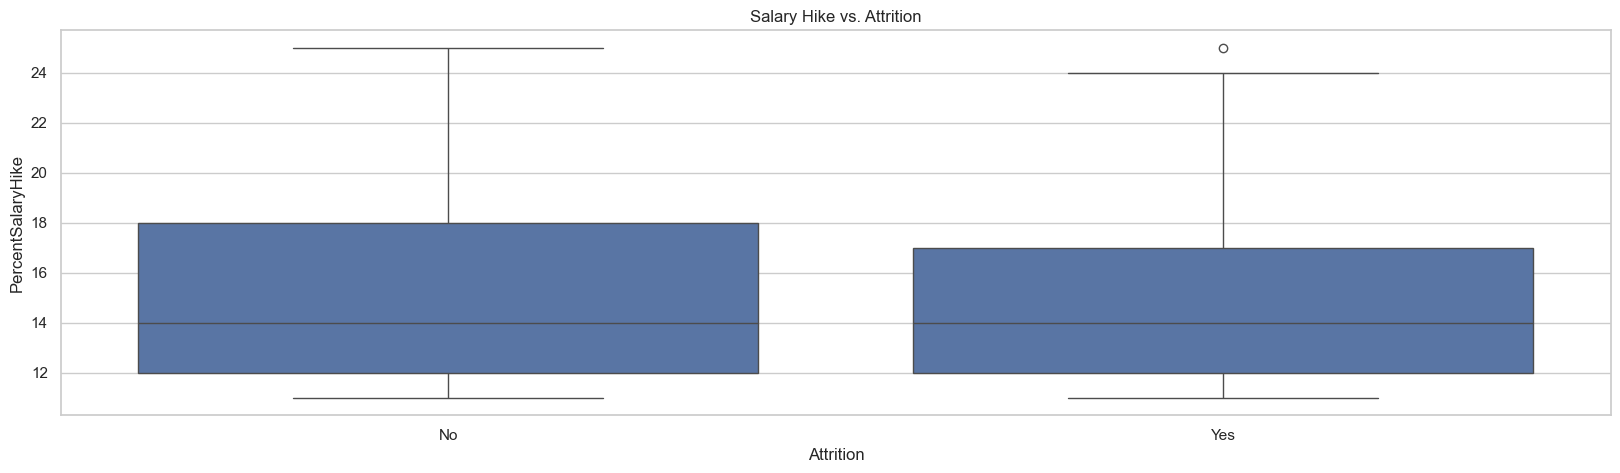

In [59]:
print(df.groupby('Attrition')['PercentSalaryHike'].describe())

sns.boxplot(x='Attrition', y='PercentSalaryHike', data=df)
plt.title("Salary Hike vs. Attrition")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## 🔎 14. Attrition vs. Years Since Last Promotion

            count      mean       std  min  25%  50%  75%   max
Attrition                                                      
0          1233.0  2.234388  3.234762  0.0  0.0  1.0  3.0  15.0
1           237.0  1.945148  3.153077  0.0  0.0  1.0  2.0  15.0


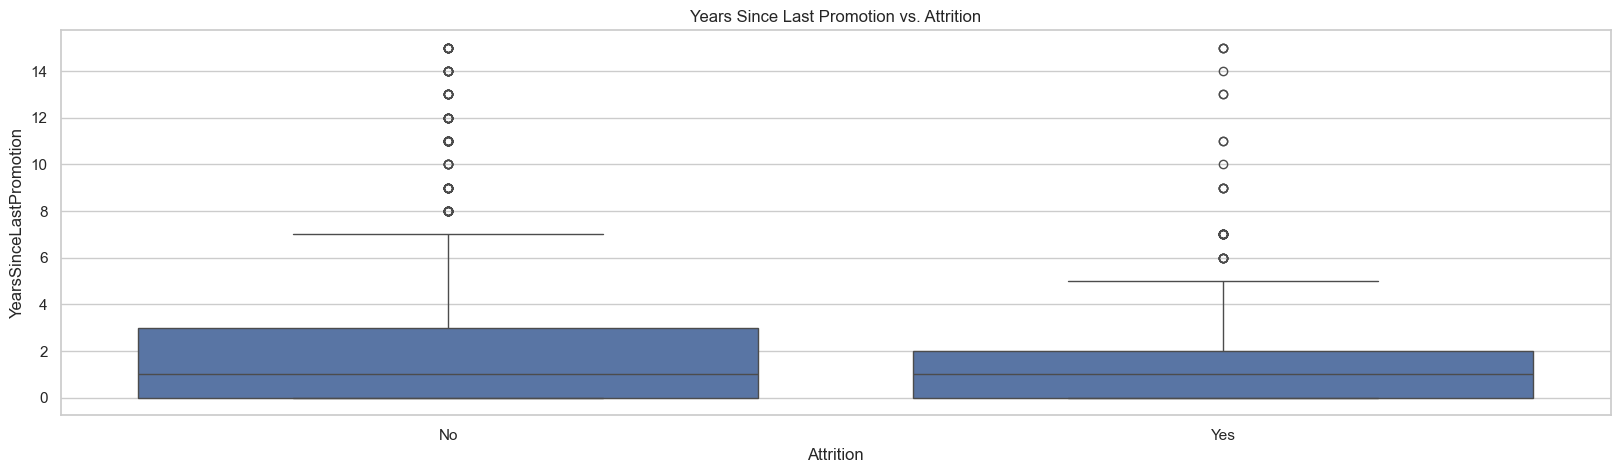

In [60]:
print(df.groupby('Attrition')['YearsSinceLastPromotion'].describe())

sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title("Years Since Last Promotion vs. Attrition")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 🧠 BEHAVIORAL PATTERNS

## 🔎 15. Overtime vs. Attrition

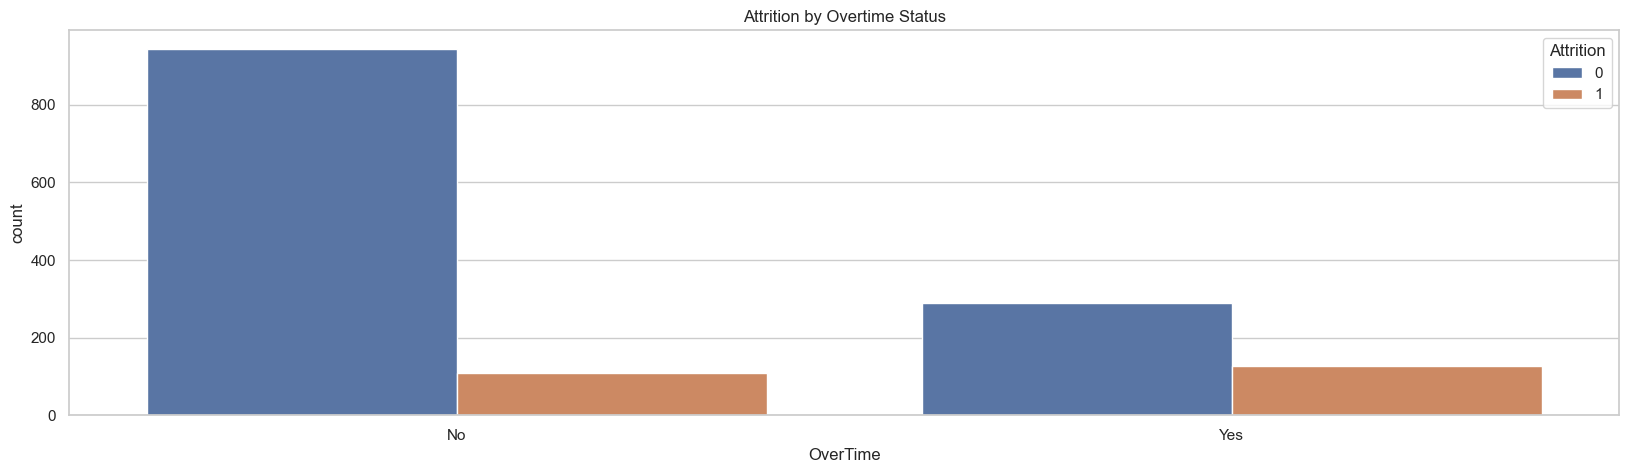

In [61]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Attrition by Overtime Status")
plt.show()


## 🔎 16. Distance from Home vs. Attrition

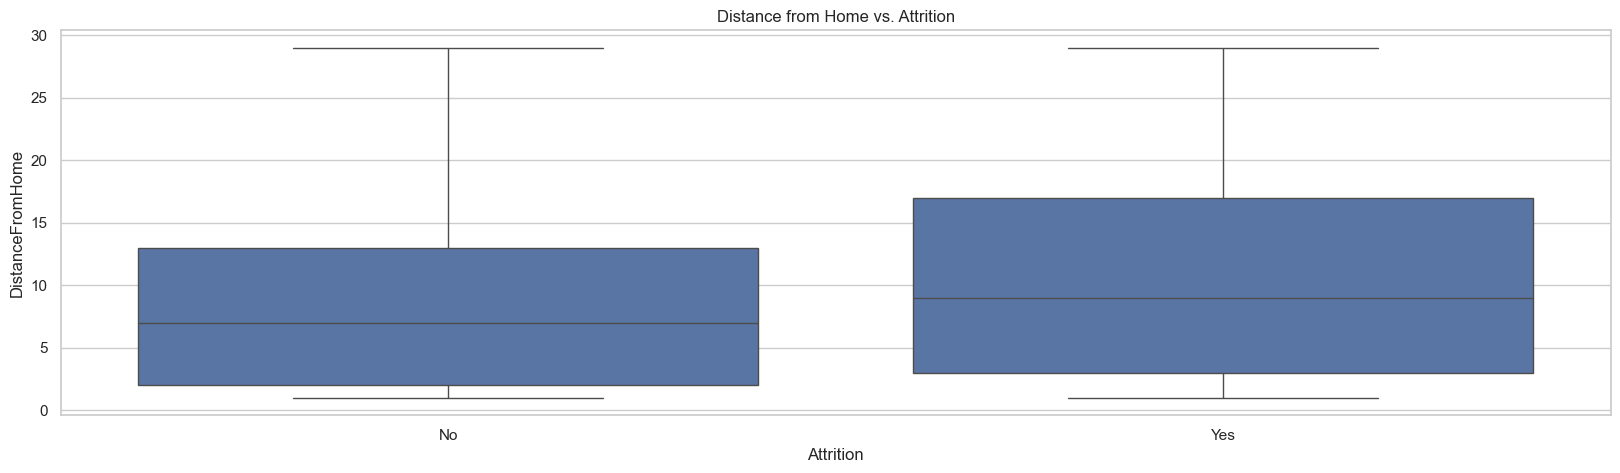

In [62]:
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title("Distance from Home vs. Attrition")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## 🔎 17. Business Travel Impact

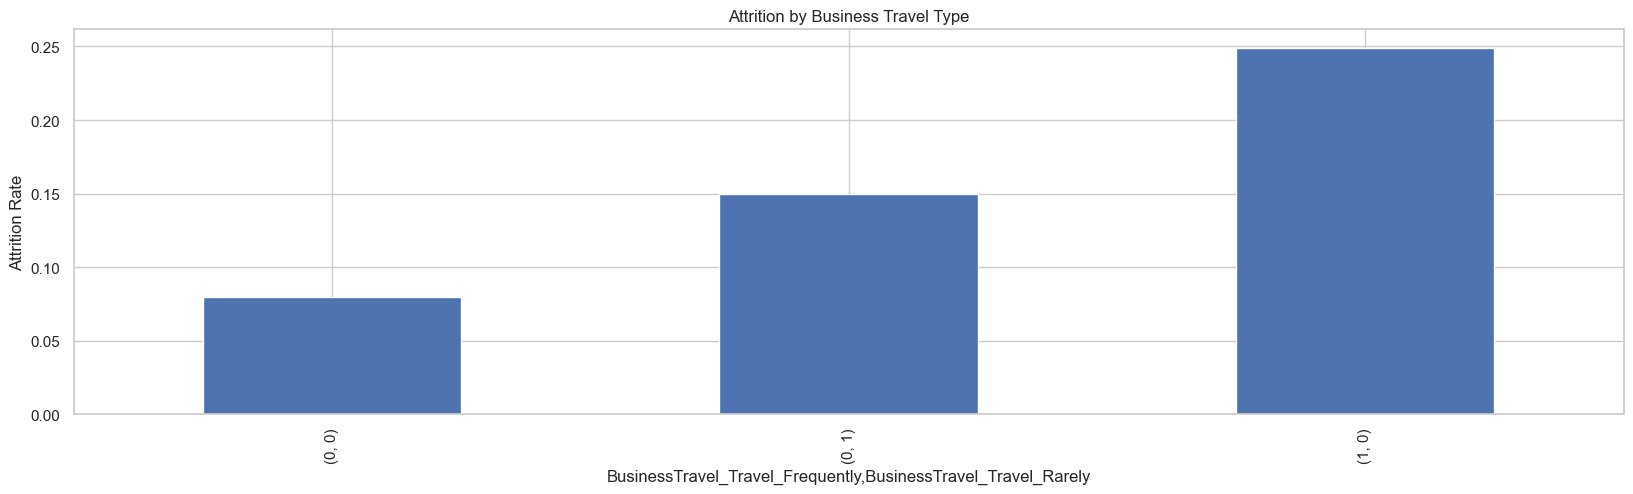

In [63]:
bt_cols = [col for col in df.columns if 'BusinessTravel' in col]
df.groupby(bt_cols)['Attrition'].mean().plot(kind='bar')
plt.title("Attrition by Business Travel Type")
plt.ylabel("Attrition Rate")
plt.show()

## 🔎 18. Number of Companies Worked vs. Attrition

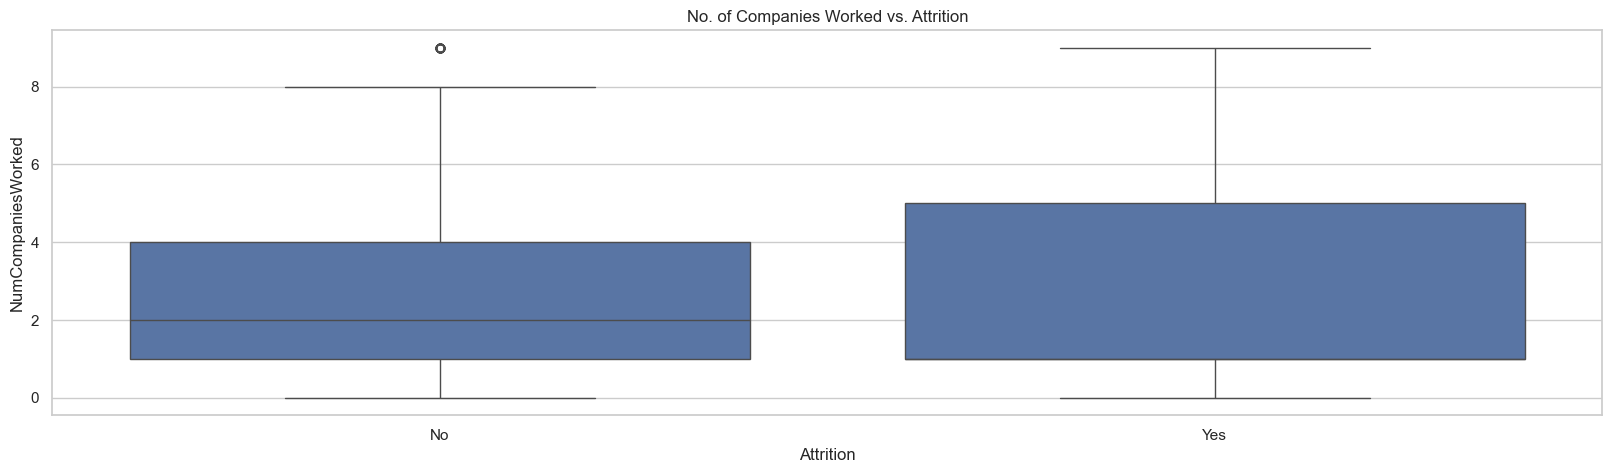

In [64]:
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=df)
plt.title("No. of Companies Worked vs. Attrition")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 🧮 MULTI-VARIATE INSIGHTS

## 🔎 19. Correlation Matrix

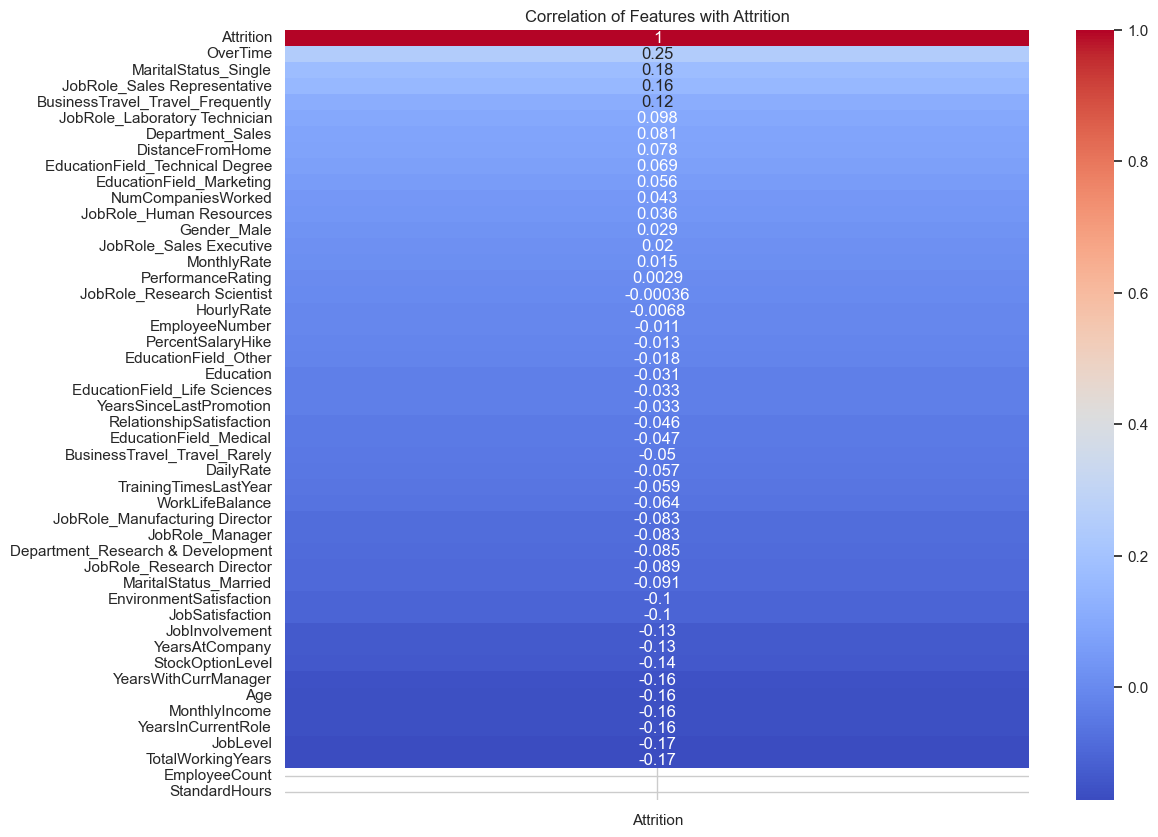

In [65]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Attrition")
plt.show()

## 🔎 20. Pairplot: Attrition, Income, Age, Tenure

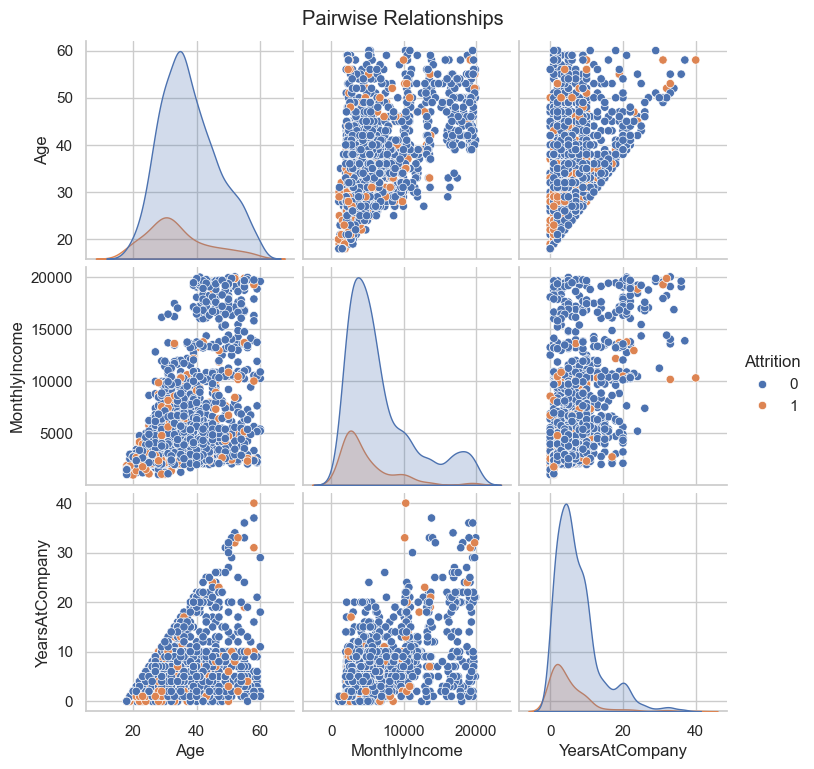

In [66]:
sns.pairplot(df[['Attrition', 'Age', 'MonthlyIncome', 'YearsAtCompany']], hue='Attrition')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

## 🔎 21. Distribution of Monthly Income

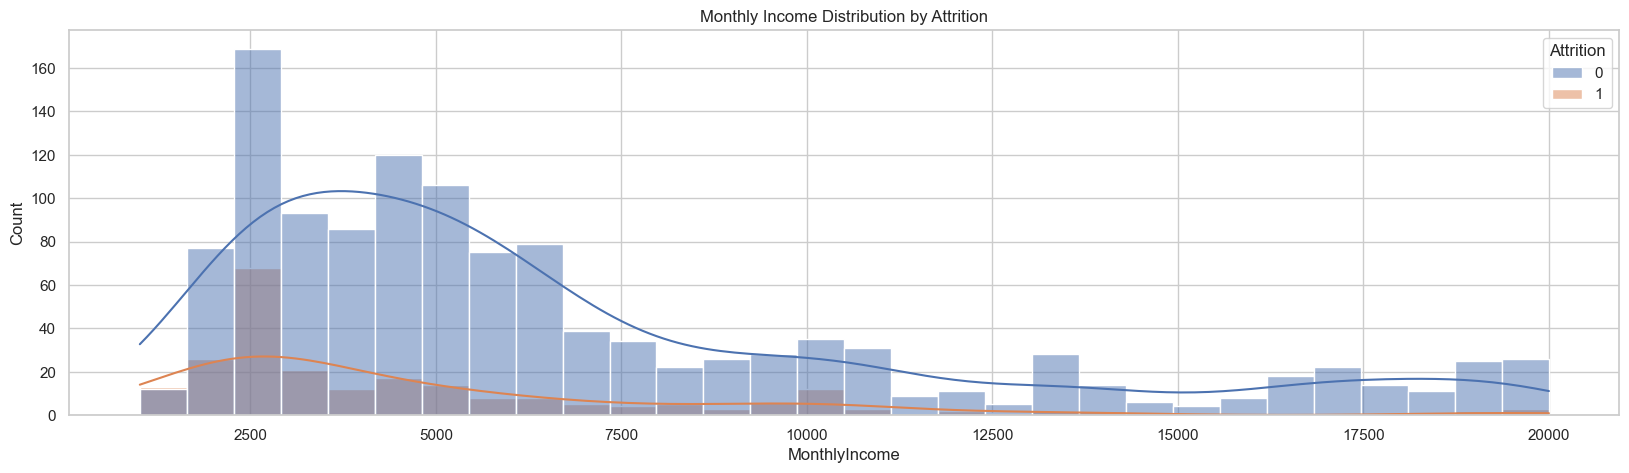

In [67]:
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True, bins=30)
plt.title("Monthly Income Distribution by Attrition")
plt.show()


## 🔎 22. Feature Importance using Random Forest

C:\Users\himan\AppData\Local\Temp\ipykernel_30220\1363020400.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20), palette='viridis')


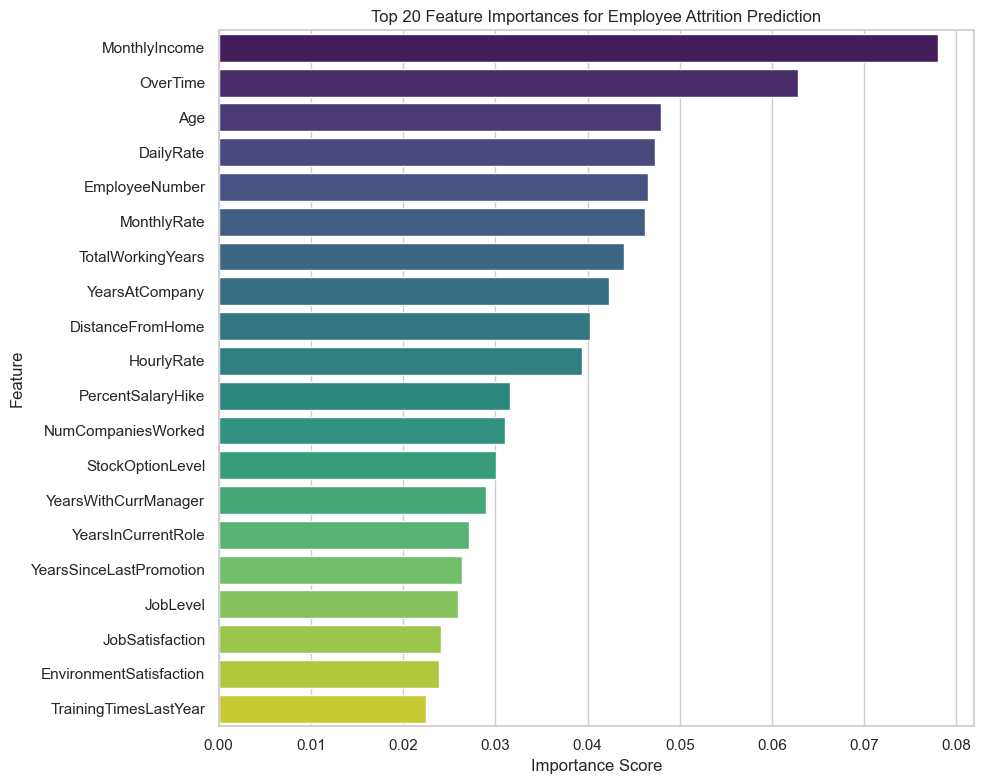

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare X and y
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Keep only numeric features
X = X.select_dtypes(include=['number'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20), palette='viridis')
plt.title('Top 20 Feature Importances for Employee Attrition Prediction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()